In [1]:
#Importing Libraries 
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:

# Load datasets
train_df = pd.read_csv("/Users/apple/Desktop/CodSoft Intership Projects /Credit Card Fraud detection /archive/fraudTrain.csv")
test_df = pd.read_csv("/Users/apple/Desktop/CodSoft Intership Projects /Credit Card Fraud detection /archive/fraudTest.csv")

In [3]:
# Initial data exploration
print(train_df.head())
print(test_df.head())
print(f"Train shape: {train_df.shape}, Test shape: {test_df.shape}")

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

In [4]:
# Check for missing values
print(f"Missing values in train set: {train_df.isnull().sum().sum()}")
print(f"Missing values in test set: {test_df.isnull().sum().sum()}")

Missing values in train set: 0
Missing values in test set: 0


In [5]:
# Combine train and test datasets
full_data = pd.concat([train_df, test_df], ignore_index=True)
print(full_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [6]:
# Dropping irrelevant columns
irrelevant_columns = ["first", "last", "job", "dob", "trans_num", "street", "trans_date_trans_time", "city", "state"]
full_data.drop(columns=irrelevant_columns, inplace=True)

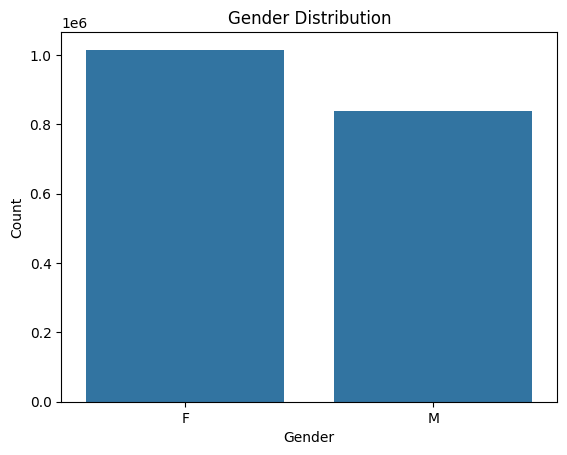

In [7]:
# Visualizing gender distribution
gender_counts = full_data['gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [8]:
# Encoding categorical variables
label_encoder = LabelEncoder()
full_data['merchant_encoded'] = label_encoder.fit_transform(full_data['merchant'])
full_data['category_encoded'] = label_encoder.fit_transform(full_data['category'])
full_data.drop(columns=['merchant', 'category'], inplace=True)


In [9]:
# One-hot encoding for 'gender' column
full_data = pd.get_dummies(full_data, columns=['gender'], drop_first=True)



In [10]:

features = full_data.drop(columns='is_fraud')
target = full_data['is_fraud']

In [18]:
# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.25, random_state=42)

In [14]:
# Model training and evaluation function
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    print(f"{model_name} Model:")
    print(confusion_matrix(y_val, predictions))
    print(classification_report(y_val, predictions))
    print(f"Accuracy: {accuracy_score(y_val, predictions)}\n")


In [19]:
# Logistic Regression
logistic_model = LogisticRegression(max_iter=100)
train_and_evaluate_model(logistic_model, "Logistic Regression")

Logistic Regression Model:
[[460640      0]
 [  2459      0]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    460640
           1       0.00      0.00      0.00      2459

    accuracy                           0.99    463099
   macro avg       0.50      0.50      0.50    463099
weighted avg       0.99      0.99      0.99    463099

Accuracy: 0.9946901202550642



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
# Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier()
train_and_evaluate_model(decision_tree_model, "Decision Tree")

Decision Tree Model:
[[367789    737]
 [   654   1299]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.64      0.67      0.65      1953

    accuracy                           1.00    370479
   macro avg       0.82      0.83      0.82    370479
weighted avg       1.00      1.00      1.00    370479

Accuracy: 0.9962454012238211



In [20]:
 # Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
train_and_evaluate_model(random_forest_model, "Random Forest")

Random Forest Model:
[[460417    223]
 [   890   1569]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    460640
           1       0.88      0.64      0.74      2459

    accuracy                           1.00    463099
   macro avg       0.94      0.82      0.87    463099
weighted avg       1.00      1.00      1.00    463099

Accuracy: 0.9975966262073552

